In [2]:
from tensorflow.keras.applications import VGG19
from os import listdir, makedirs
from os.path import join, exists, expanduser
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from numpy import newaxis
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from glob import glob
from skimage.feature import local_binary_pattern
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.regularizers import l2
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

Sample Image , Image shape is:  (360, 640, 3) , type is :  <class 'numpy.ndarray'>


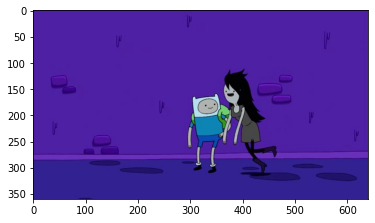

In [3]:
ad_time = '../input/cartoon-classification/cartoon_classification/TRAIN/adventure_time/adventure_time_1033.jpg'
ad_time = cv2.imread(ad_time)
print("Sample Image",", Image shape is: ",ad_time.shape,", type is : ",type(ad_time))
ad_time= cv2.cvtColor(ad_time, cv2.COLOR_BGR2RGB)
plt.imshow(ad_time)

In [1]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
img_width, img_height = 250, 350 #
train_data_dir = r'../input/cartoon-classification/cartoon_classification/TRAIN'
validation_data_dir = r'../input/cartoon-classification/cartoon_classification/TEST/'

batch_size = 8


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 119617 images belonging to 10 classes.
Found 18110 images belonging to 10 classes.


In [5]:
numberOfClass=10
batch_size = 8
epochs=50
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)


vgg = VGG19(include_top= False, weights = "imagenet", input_shape=(250,350,3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
    
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


hist = model.fit_generator(
        generator=train_generator,
        steps_per_epoch = 1500,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps = 220,
        shuffle=True,
        )

2022-03-15 11:12:59.463731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 11:12:59.549911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 11:12:59.550687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 11:12:59.552341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 250, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 175, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 175, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 87, 128)       0         
_________________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-15 11:13:02.688027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-03-15 11:13:04.407779: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1500/1500 [==============================] - 391s 256ms/step - loss: 1.2131 - accuracy: 0.6111 - val_loss: 1.0629 - val_accuracy: 0.6358
Epoch 2/50
1500/1500 [==============================] - 376s 251ms/step - loss: 0.7079 - accuracy: 0.7517 - val_loss: 0.8786 - val_accuracy: 0.7455
Epoch 3/50
1500/1500 [==============================] - 369s 246ms/step - loss: 0.5977 - accuracy: 0.7930 - val_loss: 1.3055 - val_accuracy: 0.6097
Epoch 4/50
1500/1500 [==============================] - 362s 241ms/step - loss: 0.5179 - accuracy: 0.8229 - val_loss: 0.9636 - val_accuracy: 0.7136
Epoch 5/50
1500/1500 [==============================] - 366s 244ms/step - loss: 0.4934 - accuracy: 0.8354 - val_loss: 0.6231 - val_accuracy: 0.7989
Epoch 6/50
1500/1500 [==============================] - 367s 245ms/step - loss: 0.4412 - accuracy: 0.8568 - val_loss: 0.8546 - val_accuracy: 0.7528
Epoch 7/50
1500/1500 [==============================] - 366s 244ms/step - loss: 0.4127 - accuracy: 0.8640 - val_loss: 0.656

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


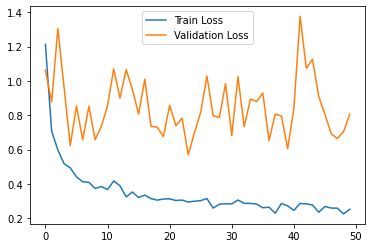

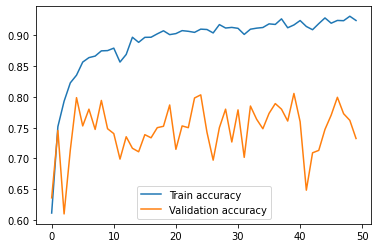

In [6]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()